# Algorithms in Bioinformatics - Final assignment
Joana Costeira Paulo


## CHO-cell growth data

1. Download the data set.
2. Read in the data to a pandas data frame.

In [1]:
import pandas as pd
df = pd.read_excel("CHOPER_IBAQ_sep.xlsx",header=0,index_col=0)
df = df[1:]
df

,iBAQ 1 (Day 3 r1),iBAQ 2 (Day 3 r2),iBAQ 3 (Day 3 r3),iBAQ 4 (Day 5 r1),iBAQ 5 (Day 5 r2),iBAQ 6 (Day 5 r3),iBAQ 7 (Day 10 r1),iBAQ 8 (Day 10 r2),iBAQ 9 (Day 10 r3),iBAQ 10 (Day 12 r1),...,iBAQ 42 (Day 39 r3),iBAQ 43 (Day 40 r1),iBAQ 44 (Day 40 r2),iBAQ 45 (Day 40 r3),iBAQ 46 (Day 41 r1),iBAQ 47 (Day 41 r2),iBAQ 48 (Day 41 r3),iBAQ 49 (Day 45 r1),iBAQ 50 (Day 45 r2),iBAQ 51 (Day 45 r3)
Protein IDs,,,,,,,,,,,,,,,,,,,,,
CON__Q3MHN5;CON__ENSEMBL:ENSBTAP00000018229,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.663600e+05,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
CON__ENSEMBL:ENSBTAP00000038253,0.000000e+00,0.000000e+00,1.534900e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
CON__P00761,2.388700e+09,3.080300e+09,3.022600e+09,2.878500e+09,2.832100e+09,2.674700e+09,837270000.0,478160000.0,656560000.0,743860000.0,...,2.065000e+09,1.440400e+09,2.167600e+09,2.618300e+09,2.933300e+09,1.424800e+09,2.518100e+09,3.003700e+09,1.504400e+09,1.563300e+09
CON__P02533;tr|G3I8F9|G3I8F9_CRIGR;CON__Q6IFX2;tr|G3I8G1|G3I8G1_CRIGR;CON__A2A4G1;CON__P08727;tr|G3I8F7|G3I8F7_CRIGR;CON__P19001;CON__Q61782;tr|G3INZ7|G3INZ7_CRIGR;CON__P35900;CON__Q9D312;CON__P05784;CON__Q99456;tr|G3IPB6|G3IPB6_CRIGR;tr|G3IPJ0|G3IPJ0_CRIGR;tr|G3HX38|G3HX38_CRIGR;tr|G3IPC7|G3IPC7_CRIGR;CON__Q8N1A0;CON__Q14525;CON__Q9UE12;CON__Q15323;CON__A2A5Y0;CON__Q14532;CON__A2AB72;CON__Q497I4;CON__O76015;CON__O76013;CON__Q7Z3Y9;CON__O76014;CON__REFSEQ:XP_986630;tr|G3I8F3|G3I8F3_CRIGR;tr|G3I8F1|G3I8F1_CRIGR,3.406000e+06,4.858500e+06,5.641600e+06,6.155600e+06,7.301600e+06,5.504800e+06,1560600.0,995070.0,1838200.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.326300e+05,5.457200e+05,0.000000e+00,0.000000e+00,0.000000e+00
CON__P02538;CON__O95678;CON__Q8VED5;tr|G3IBN7|G3IBN7_CRIGR;CON__H-INV:HIT000292931,7.718300e+06,6.341900e+06,8.328300e+06,9.096000e+06,1.770000e+07,1.688100e+07,4939500.0,2118300.0,2697100.0,0.0,...,3.245600e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.792500e+05,1.463800e+06,0.000000e+00,0.000000e+00,0.000000e+00
CON__P02584,7.714300e+06,1.489900e+07,1.597800e+07,1.149600e+07,1.468500e+07,1.289000e+07,25877000.0,15524000.0,18421000.0,46641000.0,...,3.169300e+07,3.816200e+07,2.528900e+07,3.317700e+07,5.432100e+07,1.973000e+07,2.618100e+07,1.934100e+07,6.681400e+06,7.270400e+06
CON__P02662,1.516100e+07,1.860800e+07,1.401700e+07,2.632300e+07,1.807900e+07,2.021200e+07,0.0,2232800.0,0.0,2139400.0,...,1.355000e+07,3.048700e+06,2.861100e+06,3.835900e+06,0.000000e+00,0.000000e+00,0.000000e+00,6.343600e+06,2.381800e+06,6.802500e+06
CON__P02663,2.017900e+06,1.453400e+06,1.449900e+06,2.757700e+06,1.990200e+06,1.142100e+06,300830.0,0.0,0.0,322480.0,...,1.150700e+06,3.649800e+05,6.778300e+05,1.043600e+06,9.627700e+05,4.608600e+05,1.033000e+06,1.577300e+06,3.819100e+05,5.077500e+05
CON__P02666,3.511500e+07,2.801200e+07,3.774600e+07,4.199200e+07,3.209700e+07,3.325600e+07,4307200.0,3181700.0,4413200.0,0.0,...,6.718900e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


3. Remove lines with NaN or 0-values.

In [2]:
import numpy as np
df = df.replace(0.0, np.nan)
df = df.dropna()

4. Test which proteins that are differentially expressed between day 10 and 30 at FDR 1% using a regular t-test e.g. `scipy.stats.ttest_ind`

/Users/jcp/miniconda3/envs/AlgBioInfo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


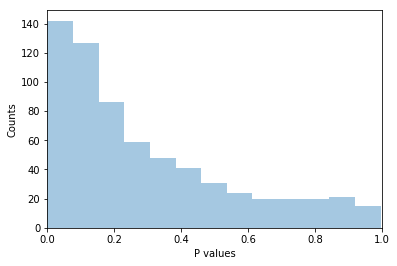

In [4]:
# This step has to be run twice in order to ouput the histrogram

from scipy.stats import ttest_ind
FDR = 0.01
day10 = ['iBAQ 7 (Day 10 r1)', 'iBAQ 8 (Day 10 r2)', 'iBAQ 9 (Day 10 r3)']
day30 = ['iBAQ 34 (Day 30 r1)', 'iBAQ 35 (Day 30 r2) ', 'iBAQ 36 (Day 30 r3)']
def get_pvalue_two_groups(row):
    return (ttest_ind(row[day10],row[day30])[1],row.name)

pv = df.apply(get_pvalue_two_groups,axis=1).tolist()
p = np.array(pv)
p = p[:,0].astype(np.float)
df["pvalues"]= p
p.sort()

import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.distplot(p, kde=False)
plt.xlim(0, 1)
graph.set(xlabel='P values', ylabel='Counts')
ymin, ymax = plt.ylim()
#plt.vlines(FDR, ymin, ymax, linestyle='--', colors='b', label='p=0.01 (FDR)', linewidth=1)
plt.show()

5. Test differential expression over time for each protein using a pandas model “Expression ~ C(Day)”.

In [22]:
# Run this step second to last

import statsmodels.api as sm
from statsmodels.formula.api import ols
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')

mod = ols('iBAQ_7_Day_10_r1 + iBAQ_8_Day_10_r2 + iBAQ_9_Day_10_r3 ~ iBAQ_34_Day_30_r1 + iBAQ_35_Day_30_r2_ + iBAQ_36_Day_30_r3',data=df)
res = mod.fit()
table =sm.stats.anova_lm(res,typ=2)
print(table)

ValueError: shapes (2488,3) and (2488,3) not aligned: 3 (dim 1) != 2488 (dim 0)

6. Compare your results to a linear regression model, e.g. “Expression ~ Day”

In [6]:
# Run this step last

mod = ols('Expression ~ Day',data=df)
res = mod.fit()
table =sm.stats.anova_lm(res,typ=2)
print(table)

PatsyError: Error evaluating factor: NameError: name 'Expression' is not defined
    Expression ~ Day
    ^^^^^^^^^^

7. Cluster the proteins using single linkage hierarchical clustering, using e.g. `seaborn`, to see if you see that the proteomes with proximity in time also end up close in the dendrogram.

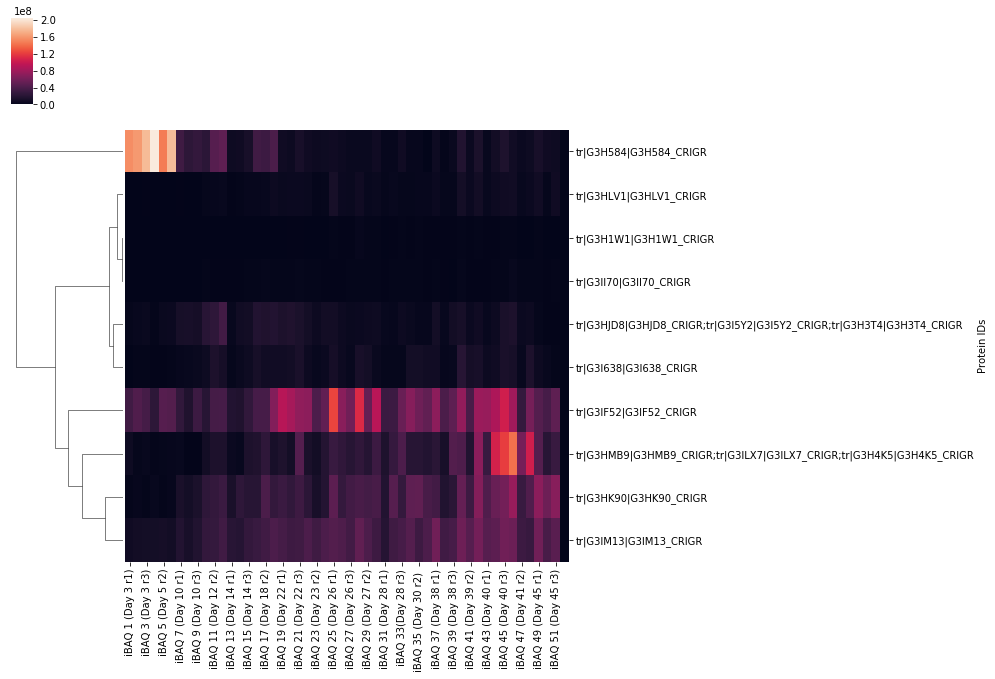

In [6]:
days10and30 = ['iBAQ 7 (Day 10 r1)', 'iBAQ 8 (Day 10 r2)', 'iBAQ 9 (Day 10 r3)', 'iBAQ 34 (Day 30 r1)', 'iBAQ 35 (Day 30 r2) ', 'iBAQ 36 (Day 30 r3)']
df = df.sort_values(by=['pvalues'])
sns.clustermap(df.loc[:, :].head(10), col_cluster=False)